# Community Notes data as of June 8, 2025. 
### Source: https://x.com/i/communitynotes/download-data
### Download files under the "Notes data" and "Note status history data" tabs to get the tsvs used in this analysis

In [1]:
import pandas as pd


notes = pd.read_csv("notes-00000.tsv", sep='\t')
status = pd.read_csv("noteStatusHistory-00000.tsv", sep='\t')


/var/folders/3t/356b2m1s0713vmrmjlw72vfm0000gn/T/ipykernel_6304/356624289.py:4: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  notes = pd.read_csv("notes-00000.tsv", sep='\t')
/var/folders/3t/356b2m1s0713vmrmjlw72vfm0000gn/T/ipykernel_6304/356624289.py:5: DtypeWarning: Columns (10,19) have mixed types. Specify dtype option on import or set low_memory=False.
  status = pd.read_csv("noteStatusHistory-00000.tsv", sep='\t')


## Counting notes rated helpful, unhelpful, or stuck in NMR

In [25]:
status['currentStatus'].value_counts()

currentStatus
NEEDS_MORE_RATINGS             1816069
CURRENTLY_RATED_HELPFUL         171210
CURRENTLY_RATED_NOT_HELPFUL      85364
Name: count, dtype: int64

Tiles breakdown:
Needs more ratings: 182 tiles (1,816,069 notes)
Currently rated helpful: 17 tiles (171,210 notes)
Currently rated not helpful: 9 tiles (85,364 notes)
Total tiles: 208
Grid size: 15x15


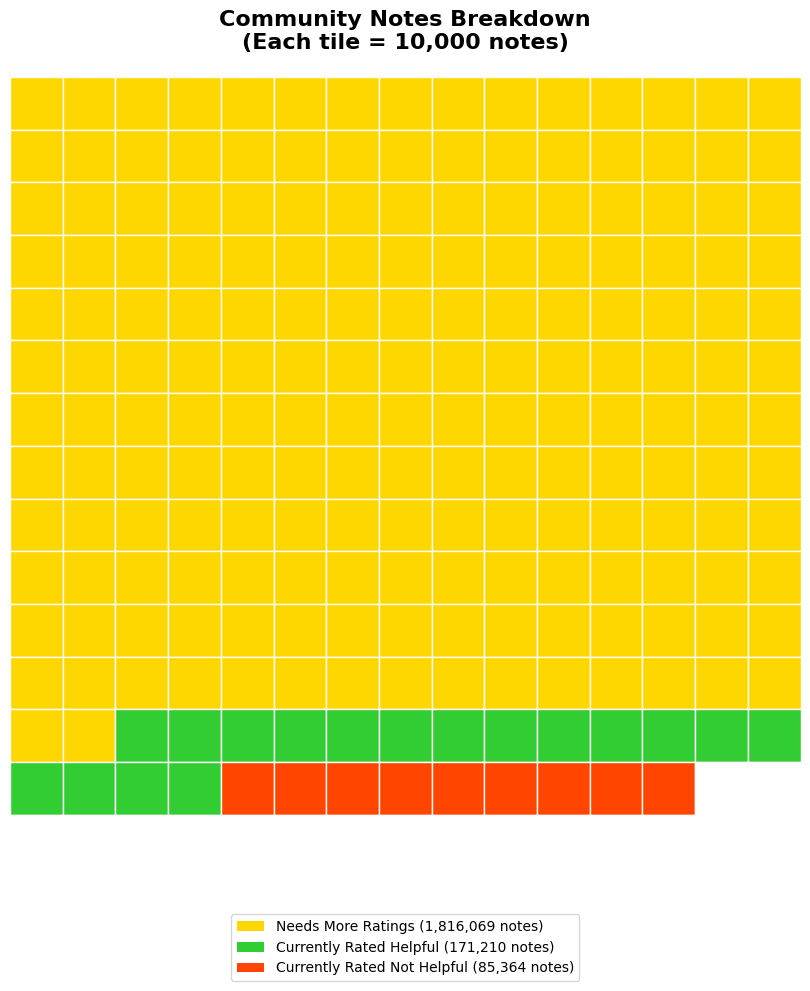


Summary:
Total notes: 2,072,643
Needs more ratings: 87.6%
Currently rated helpful: 8.3%
Currently rated not helpful: 4.1%


In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Data
needs_more_ratings = 1816069
currently_rated_helpful = 171210
currently_rated_not_helpful = 85364

# Convert to tiles (1 tile = 50,000 notes)
tiles_needs_more = round(needs_more_ratings / 10000)
tiles_helpful = round(currently_rated_helpful / 10000)
tiles_not_helpful = round(currently_rated_not_helpful / 10000)

total_tiles = tiles_needs_more + tiles_helpful + tiles_not_helpful

print(f"Tiles breakdown:")
print(f"Needs more ratings: {tiles_needs_more} tiles ({needs_more_ratings:,} notes)")
print(f"Currently rated helpful: {tiles_helpful} tiles ({currently_rated_helpful:,} notes)")
print(f"Currently rated not helpful: {tiles_not_helpful} tiles ({currently_rated_not_helpful:,} notes)")
print(f"Total tiles: {total_tiles}")

# Calculate grid dimensions (aim for roughly square)
grid_size = int(np.ceil(np.sqrt(total_tiles)))
print(f"Grid size: {grid_size}x{grid_size}")

# Create the waffle chart data
waffle_data = []

# Add tiles for each category
for _ in range(tiles_needs_more):
    waffle_data.append(0)  # Yellow for needs more ratings

for _ in range(tiles_helpful):
    waffle_data.append(1)  # Green for helpful

for _ in range(tiles_not_helpful):
    waffle_data.append(2)  # Red for not helpful

# Pad with empty tiles if needed
while len(waffle_data) < grid_size * grid_size:
    waffle_data.append(-1)  # Empty tiles

# Convert to grid
waffle_grid = np.array(waffle_data).reshape(grid_size, grid_size)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Define colors
colors = {
    0: '#FFD700',  # Yellow for needs more ratings
    1: '#32CD32',  # Green for helpful
    2: '#FF4500',  # Red for not helpful
    -1: 'white'    # White for empty tiles
}

# Plot each tile
for i in range(grid_size):
    for j in range(grid_size):
        value = waffle_grid[i, j]
        color = colors[value]
        
        # Draw rectangle for each tile
        rect = plt.Rectangle((j, grid_size-1-i), 1, 1, 
                           facecolor=color, 
                           edgecolor='white', 
                           linewidth=1.0)
        ax.add_patch(rect)

# Customize the plot
ax.set_xlim(0, grid_size)
ax.set_ylim(0, grid_size)
ax.set_aspect('equal')
ax.axis('off')

# Add title
plt.title('Community Notes Breakdown\n(Each tile = 10,000 notes)', 
          fontsize=16, fontweight='bold', pad=20)

# Create legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FFD700', label=f'Needs More Ratings ({needs_more_ratings:,} notes)'),
    Patch(facecolor='#32CD32', label=f'Currently Rated Helpful ({currently_rated_helpful:,} notes)'),
    Patch(facecolor='#FF4500', label=f'Currently Rated Not Helpful ({currently_rated_not_helpful:,} notes)')
]

plt.legend(handles=legend_elements, 
          loc='upper center', 
          bbox_to_anchor=(0.5, -0.05),
          ncol=1, 
          frameon=True,
          fontsize=10)

plt.tight_layout()
plt.show()

# Print summary statistics
total_notes = needs_more_ratings + currently_rated_helpful + currently_rated_not_helpful
print(f"\nSummary:")
print(f"Total notes: {total_notes:,}")
print(f"Needs more ratings: {needs_more_ratings/total_notes*100:.1f}%")
print(f"Currently rated helpful: {currently_rated_helpful/total_notes*100:.1f}%")
print(f"Currently rated not helpful: {currently_rated_not_helpful/total_notes*100:.1f}%")

## Looking at how long a note is stuck in NMR

In [63]:
## Converting all milliseconds time to datetime

In [10]:
import datetime
pd.set_option('display.max_columns', None)
converted_cols = ['createdAtMillis', 'timestampMillisOfFirstNonNMRStatus', 'timestampMillisOfCurrentStatus', 'timestampMillisOfStatusLock',
                  'timestampMillisOfMostRecentStatusChange', 'timestampMillisOfNmrDueToMinStableCrhTime', 'timestampMinuteOfFinalScoringOutput',
                  'timestampMillisOfFirstNmrDueToMinStableCrhTime']
status[converted_cols] = status[converted_cols].apply(pd.to_datetime, unit='ms')
status

,noteId,noteAuthorParticipantId,createdAtMillis,timestampMillisOfFirstNonNMRStatus,firstNonNMRStatus,timestampMillisOfCurrentStatus,currentStatus,timestampMillisOfLatestNonNMRStatus,mostRecentNonNMRStatus,timestampMillisOfStatusLock,lockedStatus,timestampMillisOfRetroLock,currentCoreStatus,currentExpansionStatus,currentGroupStatus,currentDecidedBy,currentModelingGroup,timestampMillisOfMostRecentStatusChange,timestampMillisOfNmrDueToMinStableCrhTime,currentMultiGroupStatus,currentModelingMultiGroup,timestampMinuteOfFinalScoringOutput,timestampMillisOfFirstNmrDueToMinStableCrhTime,current_date,time_diff
0,1352796878438424576,B021517F4F8F9F372DCD70BB8F8A21A80C12D7EFDE8B2F...,2021-01-23 01:54:44.227,NaT,NaN,2024-07-25 15:07:48.424,NEEDS_MORE_RATINGS,NaN,NaN,2023-01-18 00:51:49.873,NEEDS_MORE_RATINGS,NaN,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,1969-12-31 23:59:59.999,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1598
1,1353415873227177985,D4C9EDB464DF2D4A6D8F68CA8D1F86226B50EB9D3B0F33...,2021-01-24 18:54:24.087,NaT,NaN,2024-07-25 15:07:48.424,NEEDS_MORE_RATINGS,NaN,NaN,2023-01-18 00:51:49.873,NEEDS_MORE_RATINGS,NaN,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,1969-12-31 23:59:59.999,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1597
2,1354586938863443971,C0AF45F4C4B2240E7AB31456957E5D770FF7AFA13627C7...,2021-01-28 00:27:47.892,NaT,NaN,2024-07-25 15:07:48.424,NEEDS_MORE_RATINGS,NaN,NaN,2023-01-18 00:51:49.873,NEEDS_MORE_RATINGS,NaN,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),6.0,1969-12-31 23:59:59.999,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1593
3,1354588003075764229,9C480F7B2E882F19F9FBF75BD13FEA53031875AC42FDF6...,2021-01-28 00:32:01.619,NaT,NaN,2024-07-25 15:07:48.424,NEEDS_MORE_RATINGS,NaN,NaN,2023-01-18 00:51:49.873,NEEDS_MORE_RATINGS,NaN,NaN,NaN,NaN,ExpansionPlusModel (v1.1),NaN,1969-12-31 23:59:59.999,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1593
4,1354588172659920899,931B6CFE7C2FDF3653B0A63DC20DF3C51F8AA3BEB9D613...,2021-01-28 00:32:42.051,NaT,NaN,2024-07-25 15:07:48.424,NEEDS_MORE_RATINGS,NaN,NaN,2023-01-18 00:51:49.873,NEEDS_MORE_RATINGS,NaN,NaN,NaN,NaN,ExpansionPlusModel (v1.1),NaN,1969-12-31 23:59:59.999,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072638,1931521507072586050,171FC3825FEE24B0B9F9743A882A9631EC915BD3DB477B...,2025-06-08 01:19:47.877,NaT,NaN,2025-06-08 01:51:50.132,NEEDS_MORE_RATINGS,NaN,NaN,NaT,NaN,NaN,NaN,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,MultiGroupModel01 (v1.0),12.0,2025-06-08 01:41:16.846,NaT,NEEDS_MORE_RATINGS,1.0,1970-01-01 08:05:55.792,NaT,2025-06-10,1
2072639,1931521559816204427,32E453C719ECD33D859B3F29866068028269778333FDF8...,2025-06-08 01:20:00.452,NaT,NaN,2025-06-08 01:51:50.132,NEEDS_MORE_RATINGS,NaN,NaN,NaT,NaN,NaN,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,NaN,CoreModel (v1.1),NaN,2025-06-08 01:51:50.132,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1
2072640,1931522089556615349,8B21A955458F6D551495BEF729CBE114E9FC9BB9CD7C23...,2025-06-08 01:22:06.752,NaT,NaN,2025-06-08 01:51:50.132,NEEDS_MORE_RATINGS,NaN,NaN,NaT,NaN,NaN,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,NaN,CoreModel (v1.1),NaN,2025-06-08 01:51:50.132,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1
2072641,1931522247090479372,8109C74004521E4B326E33C44D2D45A2614EFDC636D288...,2025-06-08 01:22:44.311,NaT,NaN,2025-06-08 01:51:50.132,NEEDS_MORE_RATINGS,NaN,NaN,NaT,NaN,NaN,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,NaN,CoreModel (v1.1),NaN,2025-06-08 01:51:50.132,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1


In [11]:
## Filtering to notes that are in NMR

In [12]:
nmr = status[status['currentStatus'] == 'NEEDS_MORE_RATINGS']
nmr

,noteId,noteAuthorParticipantId,createdAtMillis,timestampMillisOfFirstNonNMRStatus,firstNonNMRStatus,timestampMillisOfCurrentStatus,currentStatus,timestampMillisOfLatestNonNMRStatus,mostRecentNonNMRStatus,timestampMillisOfStatusLock,lockedStatus,timestampMillisOfRetroLock,currentCoreStatus,currentExpansionStatus,currentGroupStatus,currentDecidedBy,currentModelingGroup,timestampMillisOfMostRecentStatusChange,timestampMillisOfNmrDueToMinStableCrhTime,currentMultiGroupStatus,currentModelingMultiGroup,timestampMinuteOfFinalScoringOutput,timestampMillisOfFirstNmrDueToMinStableCrhTime,current_date,time_diff
0,1352796878438424576,B021517F4F8F9F372DCD70BB8F8A21A80C12D7EFDE8B2F...,2021-01-23 01:54:44.227,NaT,NaN,2024-07-25 15:07:48.424,NEEDS_MORE_RATINGS,NaN,NaN,2023-01-18 00:51:49.873,NEEDS_MORE_RATINGS,NaN,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,1969-12-31 23:59:59.999,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1598
1,1353415873227177985,D4C9EDB464DF2D4A6D8F68CA8D1F86226B50EB9D3B0F33...,2021-01-24 18:54:24.087,NaT,NaN,2024-07-25 15:07:48.424,NEEDS_MORE_RATINGS,NaN,NaN,2023-01-18 00:51:49.873,NEEDS_MORE_RATINGS,NaN,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,1969-12-31 23:59:59.999,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1597
2,1354586938863443971,C0AF45F4C4B2240E7AB31456957E5D770FF7AFA13627C7...,2021-01-28 00:27:47.892,NaT,NaN,2024-07-25 15:07:48.424,NEEDS_MORE_RATINGS,NaN,NaN,2023-01-18 00:51:49.873,NEEDS_MORE_RATINGS,NaN,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),6.0,1969-12-31 23:59:59.999,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1593
3,1354588003075764229,9C480F7B2E882F19F9FBF75BD13FEA53031875AC42FDF6...,2021-01-28 00:32:01.619,NaT,NaN,2024-07-25 15:07:48.424,NEEDS_MORE_RATINGS,NaN,NaN,2023-01-18 00:51:49.873,NEEDS_MORE_RATINGS,NaN,NaN,NaN,NaN,ExpansionPlusModel (v1.1),NaN,1969-12-31 23:59:59.999,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1593
4,1354588172659920899,931B6CFE7C2FDF3653B0A63DC20DF3C51F8AA3BEB9D613...,2021-01-28 00:32:42.051,NaT,NaN,2024-07-25 15:07:48.424,NEEDS_MORE_RATINGS,NaN,NaN,2023-01-18 00:51:49.873,NEEDS_MORE_RATINGS,NaN,NaN,NaN,NaN,ExpansionPlusModel (v1.1),NaN,1969-12-31 23:59:59.999,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072638,1931521507072586050,171FC3825FEE24B0B9F9743A882A9631EC915BD3DB477B...,2025-06-08 01:19:47.877,NaT,NaN,2025-06-08 01:51:50.132,NEEDS_MORE_RATINGS,NaN,NaN,NaT,NaN,NaN,NaN,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,MultiGroupModel01 (v1.0),12.0,2025-06-08 01:41:16.846,NaT,NEEDS_MORE_RATINGS,1.0,1970-01-01 08:05:55.792,NaT,2025-06-10,1
2072639,1931521559816204427,32E453C719ECD33D859B3F29866068028269778333FDF8...,2025-06-08 01:20:00.452,NaT,NaN,2025-06-08 01:51:50.132,NEEDS_MORE_RATINGS,NaN,NaN,NaT,NaN,NaN,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,NaN,CoreModel (v1.1),NaN,2025-06-08 01:51:50.132,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1
2072640,1931522089556615349,8B21A955458F6D551495BEF729CBE114E9FC9BB9CD7C23...,2025-06-08 01:22:06.752,NaT,NaN,2025-06-08 01:51:50.132,NEEDS_MORE_RATINGS,NaN,NaN,NaT,NaN,NaN,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,NaN,CoreModel (v1.1),NaN,2025-06-08 01:51:50.132,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1
2072641,1931522247090479372,8109C74004521E4B326E33C44D2D45A2614EFDC636D288...,2025-06-08 01:22:44.311,NaT,NaN,2025-06-08 01:51:50.132,NEEDS_MORE_RATINGS,NaN,NaN,NaT,NaN,NaN,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,NaN,CoreModel (v1.1),NaN,2025-06-08 01:51:50.132,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1


In [13]:
#defining current time and calculating how long these notes have been in NMR
#using regex to remove timestamps and get duration only in days 

In [14]:
import re
status['current_date'] = pd.to_datetime("2025-06-10")
status['time_diff'] = status['current_date'] - status['createdAtMillis']
status['time_diff'] = status['time_diff'].dt.days
status

,noteId,noteAuthorParticipantId,createdAtMillis,timestampMillisOfFirstNonNMRStatus,firstNonNMRStatus,timestampMillisOfCurrentStatus,currentStatus,timestampMillisOfLatestNonNMRStatus,mostRecentNonNMRStatus,timestampMillisOfStatusLock,lockedStatus,timestampMillisOfRetroLock,currentCoreStatus,currentExpansionStatus,currentGroupStatus,currentDecidedBy,currentModelingGroup,timestampMillisOfMostRecentStatusChange,timestampMillisOfNmrDueToMinStableCrhTime,currentMultiGroupStatus,currentModelingMultiGroup,timestampMinuteOfFinalScoringOutput,timestampMillisOfFirstNmrDueToMinStableCrhTime,current_date,time_diff
0,1352796878438424576,B021517F4F8F9F372DCD70BB8F8A21A80C12D7EFDE8B2F...,2021-01-23 01:54:44.227,NaT,NaN,2024-07-25 15:07:48.424,NEEDS_MORE_RATINGS,NaN,NaN,2023-01-18 00:51:49.873,NEEDS_MORE_RATINGS,NaN,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,1969-12-31 23:59:59.999,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1598
1,1353415873227177985,D4C9EDB464DF2D4A6D8F68CA8D1F86226B50EB9D3B0F33...,2021-01-24 18:54:24.087,NaT,NaN,2024-07-25 15:07:48.424,NEEDS_MORE_RATINGS,NaN,NaN,2023-01-18 00:51:49.873,NEEDS_MORE_RATINGS,NaN,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,1969-12-31 23:59:59.999,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1597
2,1354586938863443971,C0AF45F4C4B2240E7AB31456957E5D770FF7AFA13627C7...,2021-01-28 00:27:47.892,NaT,NaN,2024-07-25 15:07:48.424,NEEDS_MORE_RATINGS,NaN,NaN,2023-01-18 00:51:49.873,NEEDS_MORE_RATINGS,NaN,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),6.0,1969-12-31 23:59:59.999,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1593
3,1354588003075764229,9C480F7B2E882F19F9FBF75BD13FEA53031875AC42FDF6...,2021-01-28 00:32:01.619,NaT,NaN,2024-07-25 15:07:48.424,NEEDS_MORE_RATINGS,NaN,NaN,2023-01-18 00:51:49.873,NEEDS_MORE_RATINGS,NaN,NaN,NaN,NaN,ExpansionPlusModel (v1.1),NaN,1969-12-31 23:59:59.999,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1593
4,1354588172659920899,931B6CFE7C2FDF3653B0A63DC20DF3C51F8AA3BEB9D613...,2021-01-28 00:32:42.051,NaT,NaN,2024-07-25 15:07:48.424,NEEDS_MORE_RATINGS,NaN,NaN,2023-01-18 00:51:49.873,NEEDS_MORE_RATINGS,NaN,NaN,NaN,NaN,ExpansionPlusModel (v1.1),NaN,1969-12-31 23:59:59.999,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072638,1931521507072586050,171FC3825FEE24B0B9F9743A882A9631EC915BD3DB477B...,2025-06-08 01:19:47.877,NaT,NaN,2025-06-08 01:51:50.132,NEEDS_MORE_RATINGS,NaN,NaN,NaT,NaN,NaN,NaN,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,MultiGroupModel01 (v1.0),12.0,2025-06-08 01:41:16.846,NaT,NEEDS_MORE_RATINGS,1.0,1970-01-01 08:05:55.792,NaT,2025-06-10,1
2072639,1931521559816204427,32E453C719ECD33D859B3F29866068028269778333FDF8...,2025-06-08 01:20:00.452,NaT,NaN,2025-06-08 01:51:50.132,NEEDS_MORE_RATINGS,NaN,NaN,NaT,NaN,NaN,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,NaN,CoreModel (v1.1),NaN,2025-06-08 01:51:50.132,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1
2072640,1931522089556615349,8B21A955458F6D551495BEF729CBE114E9FC9BB9CD7C23...,2025-06-08 01:22:06.752,NaT,NaN,2025-06-08 01:51:50.132,NEEDS_MORE_RATINGS,NaN,NaN,NaT,NaN,NaN,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,NaN,CoreModel (v1.1),NaN,2025-06-08 01:51:50.132,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1
2072641,1931522247090479372,8109C74004521E4B326E33C44D2D45A2614EFDC636D288...,2025-06-08 01:22:44.311,NaT,NaN,2025-06-08 01:51:50.132,NEEDS_MORE_RATINGS,NaN,NaN,NaT,NaN,NaN,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,NaN,CoreModel (v1.1),NaN,2025-06-08 01:51:50.132,NaT,NaN,NaN,1970-01-01 08:05:55.792,NaT,2025-06-10,1


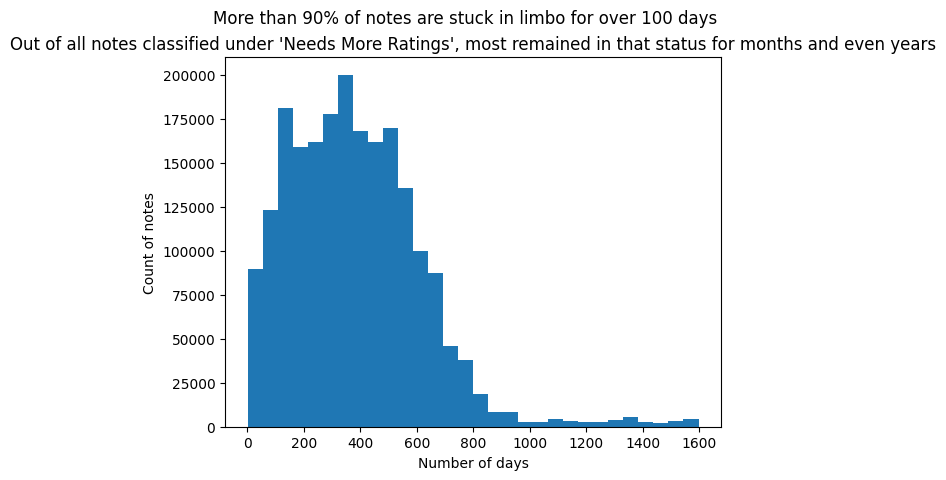

In [15]:
##plot
import matplotlib.pyplot as plt

plt.hist(status['time_diff'].dropna(), bins=30)  # Adjust bins as needed
plt.xlabel('Number of days')
plt.ylabel('Count of notes')
plt.suptitle('More than 90% of notes are stuck in limbo for over 100 days')
plt.title('Out of all notes classified under \'Needs More Ratings\', most remained in that status for months and even years')
# plt.show()
plt.savefig('nmr_chart.svg', format='svg')

In [16]:
##calculating % of notes in NMR for more than 100 days 
total = status['time_diff'].notna().sum()
count_100_and_more = (status['time_diff'] >= 100).sum()
percent_100_and_more = (count_100_and_more / total) * 100
percent_100_and_more

90.81834160538018

In [17]:
#putting this in the chart headline

In [ ]:
##how many notes have NNN

In [19]:
notes['summary'].str.contains('NNN', na=False).sum()

255983

## Examining Shadow of Ezra note

In [31]:
#it shows here that the note was initially rated helpful but the rating changed later
shadow_of_ezra = status[status['noteId'] == 1903157869093990570]
shadow_of_ezra

,noteId,noteAuthorParticipantId,createdAtMillis,timestampMillisOfFirstNonNMRStatus,firstNonNMRStatus,timestampMillisOfCurrentStatus,currentStatus,timestampMillisOfLatestNonNMRStatus,mostRecentNonNMRStatus,timestampMillisOfStatusLock,lockedStatus,timestampMillisOfRetroLock,currentCoreStatus,currentExpansionStatus,currentGroupStatus,currentDecidedBy,currentModelingGroup,timestampMillisOfMostRecentStatusChange,timestampMillisOfNmrDueToMinStableCrhTime,currentMultiGroupStatus,currentModelingMultiGroup,timestampMinuteOfFinalScoringOutput,timestampMillisOfFirstNmrDueToMinStableCrhTime,current_date,time_diff
1930913,1903157869093990570,2A6B630D0AEA2ACC36E2189A989B042C8F44788D5C6526...,2025-03-21 18:52:49.613,2025-03-21 21:40:03.538,CURRENTLY_RATED_HELPFUL,2025-04-04 19:01:52.377,NEEDS_MORE_RATINGS,1.742593e+12,CURRENTLY_RATED_HELPFUL,2025-04-04 19:01:52.377,NEEDS_MORE_RATINGS,NaN,NaN,NEEDS_MORE_RATINGS,NaN,CoreWithTopicsModel (v1.1),NaN,2025-03-21 23:31:06.259,1969-12-31 23:59:59.999,NaN,NaN,1970-01-01 08:05:55.792,2025-03-21 20:28:14.023,2025-06-10,80


In [34]:
#checking the actual content of the note
pd.set_option('display.max_colwidth', None)
notes[notes['noteId'] == 1903157869093990570]

,noteId,noteAuthorParticipantId,createdAtMillis,tweetId,classification,believable,harmful,validationDifficulty,misleadingOther,misleadingFactualError,misleadingManipulatedMedia,misleadingOutdatedInformation,misleadingMissingImportantContext,misleadingUnverifiedClaimAsFact,misleadingSatire,notMisleadingOther,notMisleadingFactuallyCorrect,notMisleadingOutdatedButNotWhenWritten,notMisleadingClearlySatire,notMisleadingPersonalOpinion,trustworthySources,summary,isMediaNote
1606562,1903157869093990570,2A6B630D0AEA2ACC36E2189A989B042C8F44788D5C6526EF4EAC8856A79A73D8,1742583169613,1903086242842935485,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,1,0,0,0,1,0,0,0,0,0,0,1,There is no evidence “vitamin B shots” was code for medical-grade methamphetamine. Dr. Travell was called upon by the personal orthopedic surgeon of Senator John F. Kennedy to assist with back pain treatments (via procaine injections) https://www.pain-education.com/dr-travell.html https://www.webmd.com/vitamins/ai/ingredientmono-391/procaine,0
